In [850]:
#importing all libries
import numpy as np 
import pandas as pd
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import pyplot
# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

# Dataset Introduction

#### Data Fields

ID - unique ID given to an applicant

parents - occupation of parents (usual, pretentious, great_pret)

has_nurs - child's nursery (proper, less_proper, improper, critical, very_crit)

form - form of the family (complete, completed, incomplete, foster)

children - (children number (1, 2, 3, more)

housing - housing conditions (convenient, less_conv, critical)

finance - financial standing of the family (convenient, inconv)

social - social conditions (non-prob, slightly_prob, problematic)

health - health conditions (recommended, priority, not_recom)

app_status - label/target/response variable (1-selected, 0-not selected)

# Data Analysis + Vizualizations

In [851]:
pd.pandas.set_option("display.max_columns",None)
train=pd.read_csv("train_data.csv")
train

,ID,parents,has_nurs,form,children,housing,finance,social,health,app_status
0,1,usual,less_proper,complete,3,critical,convenient,problematic,not_recom,0
1,2,pretentious,very_crit,completed,1,convenient,inconv,nonprob,not_recom,0
2,3,pretentious,proper,incomplete,1,less_conv,convenient,slightly_prob,priority,1
3,4,great_pret,improper,complete,1,convenient,convenient,nonprob,recommended,1
4,5,great_pret,less_proper,completed,1,convenient,convenient,slightly_prob,priority,1
...,...,...,...,...,...,...,...,...,...,...
10363,10364,usual,improper,incomplete,3,less_conv,convenient,problematic,recommended,1
10364,10365,great_pret,less_proper,incomplete,3,convenient,inconv,nonprob,not_recom,0
10365,10366,pretentious,proper,complete,2,less_conv,inconv,problematic,priority,1
10366,10367,pretentious,very_crit,completed,1,less_conv,convenient,slightly_prob,not_recom,0


In [852]:
train.shape

(10368, 10)

In [853]:
train.columns

Index(['ID', 'parents', 'has_nurs', 'form', 'children', 'housing', 'finance',
       'social', 'health', 'app_status'],
      dtype='object')

In [854]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10368 entries, 0 to 10367
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10368 non-null  int64 
 1   parents     10368 non-null  object
 2   has_nurs    10368 non-null  object
 3   form        10368 non-null  object
 4   children    10368 non-null  object
 5   housing     10368 non-null  object
 6   finance     10368 non-null  object
 7   social      10368 non-null  object
 8   health      10368 non-null  object
 9   app_status  10368 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 810.1+ KB


In [855]:
train.describe()

,ID,app_status
count,10368.00000,10368.000000
mean,5184.50000,0.354360
std,2993.12813,0.478342
min,1.00000,0.000000
25%,2592.75000,0.000000
50%,5184.50000,0.000000
75%,7776.25000,1.000000
max,10368.00000,1.000000


In [856]:
#find the percentage of all missing values
features_with_null_values=[features for features in train.columns if train[features].isnull().sum()>1]

for feature in features_with_null_values:
    print(feature," : ",np.round(train[feature].isnull().mean(),4),"%")
          
print("\nfeature count with null values ",len(features_with_null_values))


feature count with null values  0


#### With above code we figured out there are no missing values in this dataset

## Questions?

Q1 How is the parents destribution?

Q2 Is child's nursery effected to the approval ?

Q3 form - form of the family statues effected to the app_status? 

contunued with all features


### Parents 

In [857]:
df_parents=train['parents'].value_counts().to_frame().reset_index().rename(columns={'index':'parents','parents':'count'})

fig = go.Figure(go.Bar(
    x=df_parents['parents'],y=df_parents['count'],
    marker={'color': df_parents['count'], 
    'colorscale': 'Viridis'},  
    text=df_parents['count'],
    textposition = "outside",
))
fig.update_layout(title_text='parent Distribution',xaxis_title="parents",yaxis_title="Count ",title_x=0.5)
fig.show()

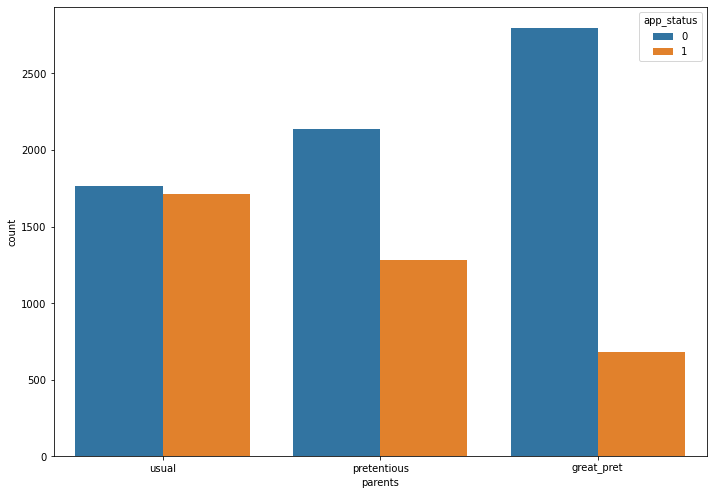

In [858]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x="parents",hue="app_status", data=train)

In [859]:
df_parents=train.groupby(by =['parents','app_status'])['ID'].count().to_frame().reset_index().rename(columns={'parents':'parents','app_status':'app_status','ID':'count'})

fig = px.bar(df_parents, x="parents", y="count", color="app_status", barmode="group",
             
             )
fig.update_layout(title_text='parent destribution with app status',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.show()

#### Conclusioin : parent  occupation is usual , the applicent has more probability to get the approval

###  child's nursery  

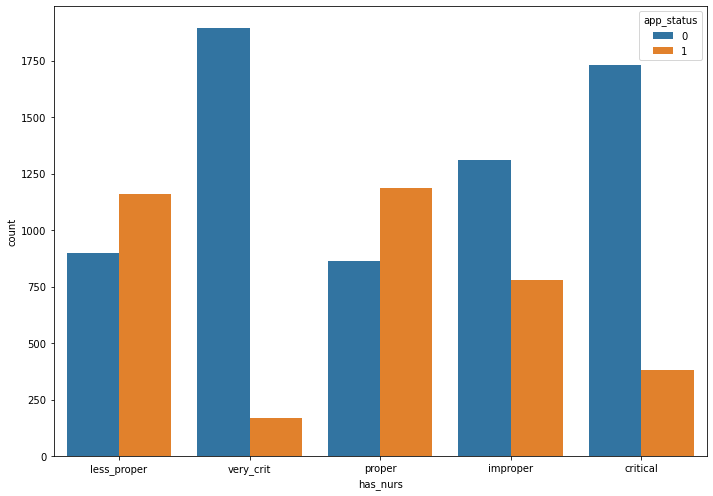

In [860]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x="has_nurs",hue="app_status", data=train)

In [861]:
df_nursery=train['has_nurs'].value_counts().to_frame().reset_index().rename(columns={'index':'has_nurs','has_nurs':'count'})

fig = go.Figure(go.Bar(
    x=df_nursery['has_nurs'],y=df_nursery['count'],
    marker={'color': df_nursery['count'], 
    'colorscale': 'Viridis'},  
    text=df_nursery['count'],
    textposition = "outside",
))
fig.update_layout(title_text="child's nursery destribution",xaxis_title="has nursery ones",yaxis_title="Count",title_x=0.5)
fig.show()

In [862]:
df_nursery=train.groupby(by =['has_nurs','app_status'])['ID'].count().to_frame().reset_index().rename(columns={'has_nurs':'has_nurs','app_status':'app_status','ID':'count'})

fig = px.bar(df_nursery, x="has_nurs", y="count", color="app_status", barmode="group",
             
             )
fig.update_layout(title_text="child's nursery destribution with app status",title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.show()

##### Conclusioin : majority of approved applicant's child nursery levels are less_proper and proper and very critical level appications most of the time got rejected

###   form of the family (complete, completed, incomplete, foster

In [863]:
df_form=train.groupby(by =['form','app_status'])['ID'].count().to_frame().reset_index().rename(columns={'form':'form','app_status':'app_status','ID':'count'})

fig = px.bar(df_form, x="form", y="count", color="app_status", barmode="group",
             
             )
fig.update_layout(title_text="family form with app status",title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.show()

#### Conclusioin : family of the form statues destribution kind of same in all statues

###   children 

In [864]:
df_children=train.groupby(by =['children','app_status'])['ID'].count().to_frame().reset_index().rename(columns={'children':'children','app_status':'app_status','ID':'count'})

fig = px.bar(df_children, x="children", y="count", color="app_status", barmode="group",
             
             )
fig.update_layout(title_text="children count destribution with app_status",title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.show()

#### Conclusioin : majority of approved applicents has one child

### housing

In [865]:
df_house=train['housing'].value_counts().to_frame().reset_index().rename(columns={'index':'housing','housing':'count'})
fig = go.Figure([go.Pie(labels=df_house['housing'], values=df_house['count'],pull=[0,0.2])])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')
fig.update_layout(title="housing count",title_x=0.45)
fig.show()

In [866]:
df_house=train.groupby(by =['housing','app_status'])['ID'].count().to_frame().reset_index().rename(columns={'housing':'housing','app_status':'app_status','ID':'count'})

fig = px.bar(df_house, x="housing", y="count", color="app_status", barmode="group",
             
             )
fig.update_layout(title_text="housing destributon with app_status",title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.show()

#### Couclusion : majority rejection was critical housiong status applicents

### social 

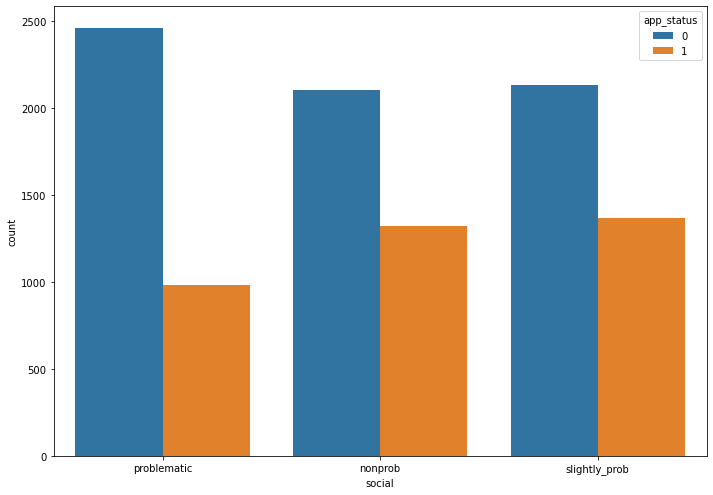

In [867]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x="social",hue="app_status", data=train)

### finance 

#### in generally financial statues should be critical feature for loan application process, let's see what data tells us :D

In [868]:
df_finance=train['finance'].value_counts().to_frame().reset_index().rename(columns={'index':'finance','finance':'count'})
fig = go.Figure([go.Pie(labels=df_finance['finance'], values=df_finance['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')
fig.update_layout(title="Financial Status",title_x=0.45)
fig.show()

#### most of the applicents in inconvenient financial status, let's see how was the aproval status

In [869]:
df_finance=train.groupby(by =['finance','app_status'])['ID'].count().to_frame().reset_index().rename(columns={'finance':'finance','app_status':'app_status','ID':'count'})

fig = px.bar(df_finance, x="finance", y="count", color="app_status", barmode="group",
             
             )
fig.update_layout(title_text="finance destributon with app_status",title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.show()

#### Couclusion : not much difference shown from data that we expected, but most rejection was inconvenient finance status

### health

#### this should be the most effective feature in this dataset to effect to predict the target 

In [870]:
df_health=train['health'].value_counts().to_frame().reset_index().rename(columns={'index':'health','health':'count'})

fig = go.Figure(data=[go.Scatter(
    x=df_health['health'], y=df_health['count'],
    mode='markers',
    marker=dict(
        color=df_health['count'],
        size=df_health['count']*0.03, # Multiplying by 0.3 to reduce size and stay uniform accross all points
        showscale=True
    ))])

fig.update_layout(title='Health Status',xaxis_title="status",yaxis_title="count",title_x=0.5)
fig.show()

#### most of applicents in not recommended health status

In [871]:
feature="health"
df_health=train.groupby(by =[feature,'app_status'])['ID'].count().to_frame().reset_index().rename(columns={feature:feature,'app_status':'app_status','ID':'count'})
fig = px.bar(df_health, x=feature, y="count", color="app_status", barmode="group",)
fig.update_layout(title_text="finance destributon with app_status",title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )

fig.show()

#### Conclution : all not recommended health status applicents were rejected and this is the most valueble feature in this dataset to get application approved or rejected 

### app_status

In [872]:
df_app_status=train['app_status'].value_counts().to_frame().reset_index().rename(columns={'index':'app_status','app_status':'count'})
fig = go.Figure([go.Pie(labels=df_app_status['app_status'], values=df_app_status['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')
fig.update_layout(title="app_status",title_x=0.5)
fig.show()

# testing - testing prediction using different ML models

In [873]:
#importing
df=train.copy()
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
logreg=LogisticRegression(solver="lbfgs")
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn.metrics import accuracy_score

In [874]:
df

,ID,parents,has_nurs,form,children,housing,finance,social,health,app_status
0,1,usual,less_proper,complete,3,critical,convenient,problematic,not_recom,0
1,2,pretentious,very_crit,completed,1,convenient,inconv,nonprob,not_recom,0
2,3,pretentious,proper,incomplete,1,less_conv,convenient,slightly_prob,priority,1
3,4,great_pret,improper,complete,1,convenient,convenient,nonprob,recommended,1
4,5,great_pret,less_proper,completed,1,convenient,convenient,slightly_prob,priority,1
...,...,...,...,...,...,...,...,...,...,...
10363,10364,usual,improper,incomplete,3,less_conv,convenient,problematic,recommended,1
10364,10365,great_pret,less_proper,incomplete,3,convenient,inconv,nonprob,not_recom,0
10365,10366,pretentious,proper,complete,2,less_conv,inconv,problematic,priority,1
10366,10367,pretentious,very_crit,completed,1,less_conv,convenient,slightly_prob,not_recom,0


In [875]:
X=df.drop(["ID","app_status"],axis="columns")

In [876]:
X.head()

,parents,has_nurs,form,children,housing,finance,social,health
0,usual,less_proper,complete,3,critical,convenient,problematic,not_recom
1,pretentious,very_crit,completed,1,convenient,inconv,nonprob,not_recom
2,pretentious,proper,incomplete,1,less_conv,convenient,slightly_prob,priority
3,great_pret,improper,complete,1,convenient,convenient,nonprob,recommended
4,great_pret,less_proper,completed,1,convenient,convenient,slightly_prob,priority


In [877]:
X.shape

(10368, 8)

In [878]:
y=df.app_status

In [879]:
y

0        0
1        0
2        1
3        1
4        1
        ..
10363    1
10364    0
10365    1
10366    0
10367    0
Name: app_status, Length: 10368, dtype: int64

In [880]:
y.shape

(10368,)

In [881]:
y.value_counts(normalize=True)

0    0.64564
1    0.35436
Name: app_status, dtype: float64

In [882]:
column_trans=make_column_transformer(
    (OneHotEncoder(),['parents', 'has_nurs', 'form', 'children', 'housing', 'finance','social', 'health']),
    remainder="passthrough")

In [883]:
column_trans.fit_transform(X)

<10368x27 sparse matrix of type '<class 'numpy.float64'>'
	with 82944 stored elements in Compressed Sparse Row format>

## LogisticRegression

### pipeline 

In [884]:
pipe_logreg= make_pipeline(column_trans,logreg)

In [885]:
s=cross_val_score(pipe_logreg,X,y,cv=5,scoring="accuracy")

In [886]:
s

array([0.93587271, 0.93924783, 0.93442623, 0.93825374, 0.93342981])

### accuracy score 

In [887]:
s.mean()

0.9362460639875033

## Support Vector Machines 

In [888]:
from sklearn import svm

In [889]:
clf = svm.SVC()

### pipeline 

In [890]:
pipe_svc= make_pipeline(column_trans,clf)

In [891]:
s=cross_val_score(pipe_svc,X,y,cv=5,scoring="accuracy")

### accuracy score  

In [892]:
s.mean()

0.9994211753169393

## train test splitting 

In [893]:
X_train, X_test, y_train, y_test = train_test_split(df, df.app_status, test_size=0.2, shuffle=False)

In [894]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['parents', 'has_nurs',
                                                   'form', 'children',
                                                   'housing', 'finance',
                                                   'social', 'health'])])),
                ('svc', SVC())])

In [895]:
predicted = pipe_svc.predict(X_test)

# Confusion matrix

Confusion matrix:
[[1340    0]
 [ 734    0]]


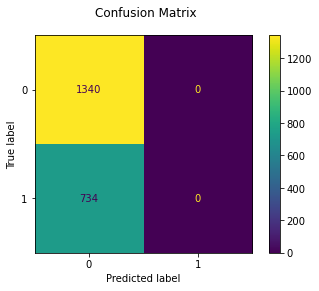

In [896]:
disp = metrics.plot_confusion_matrix(pipe_svc, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

## most accurate model is SVC and we decided to use it for the prediction 

### predect

In [897]:
test=pd.read_csv("test_data.csv")

In [898]:
test

,ID,parents,has_nurs,form,children,housing,finance,social,health
0,1,usual,proper,complete,1,convenient,convenient,nonprob,recommended
1,2,usual,proper,complete,1,convenient,inconv,nonprob,priority
2,3,usual,proper,complete,1,convenient,inconv,problematic,priority
3,4,usual,proper,complete,1,less_conv,convenient,problematic,recommended
4,5,usual,proper,complete,1,less_conv,convenient,problematic,priority
...,...,...,...,...,...,...,...,...,...
2587,2588,great_pret,very_crit,foster,more,critical,convenient,slightly_prob,priority
2588,2589,great_pret,very_crit,foster,more,critical,convenient,problematic,recommended
2589,2590,great_pret,very_crit,foster,more,critical,convenient,problematic,priority
2590,2591,great_pret,very_crit,foster,more,critical,inconv,nonprob,recommended


In [899]:
pipe_svc.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['parents', 'has_nurs',
                                                   'form', 'children',
                                                   'housing', 'finance',
                                                   'social', 'health'])])),
                ('svc', SVC())])

In [900]:
test=pipe_svc.predict(test)

In [901]:
test

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [902]:
ID=[ID for ID in range (1,2593)]

In [903]:
test

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [904]:
np.savetxt("result.csv", test, delimiter=",")

In [905]:
np.savetxt("id.csv", ID, delimiter=",")

In [906]:
f=pd.read_excel("result-final.xlsx")

In [907]:
f

,ID,app_status
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
2587,2588,0
2588,2589,0
2589,2590,0
2590,2591,0


In [908]:
f.to_csv (r'tech_fusion_prediction.csv', index = None, header=True)

### Prediction Destribution

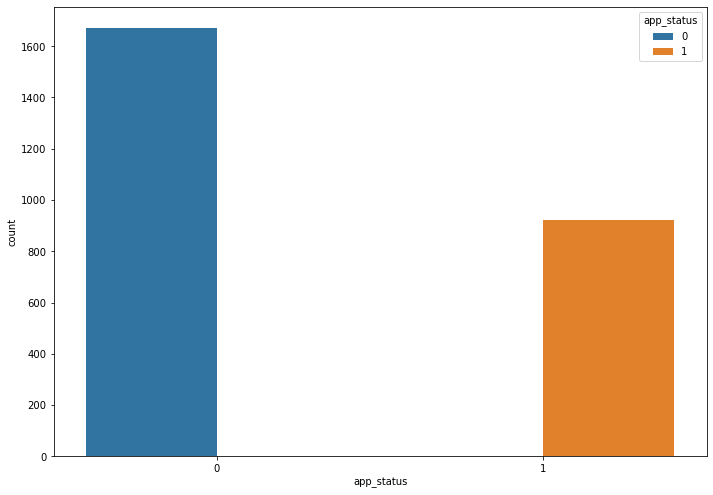

In [909]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x="app_status",hue="app_status", data=f)